Data from Python:
READY!
Key pressed
3
hi
hi2
Reached the goal after 1.07 seconds:
Number of iterations passed: 25 / 5000
RRT length:  24
Constructing the path...
Reached RRT start node
Path smoothing...
[[749.0, 499.0], [750.0, 497.0], [750.0, 496.0], [751.0, 494.0], [751.0, 491.0], [753.0, 487.0], [761.0, 480.0], [805.0, 450.0], [853.0, 419.0]]
809.8617165911721
Linear Velocity 1: 4.04930858295586
Angular Velocity 1: -6.078521180213605
630.00 425.00 90.00
FINISH
3
hi
hi2
Reached the goal after 3.60 seconds:
Number of iterations passed: 136 / 5000
RRT length:  127
Constructing the path...
Reached RRT start node
Path smoothing...
[[749.0, 499.0], [750.0, 497.0], [750.0, 496.0], [751.0, 494.0], [751.0, 491.0], [753.0, 487.0], [761.0, 480.0], [805.0, 450.0], [853.0, 419.0]]
809.691839872155
Linear Velocity 1: 4.048459199360775
Angular Velocity 1: -6.070315400582118
629.50 424.50 90.00
FINISH
3
hi
hi2
Reached the goal after 7.48 seconds:
Number of iterations passed: 351 / 5000
RRT length:

KeyboardInterrupt: 

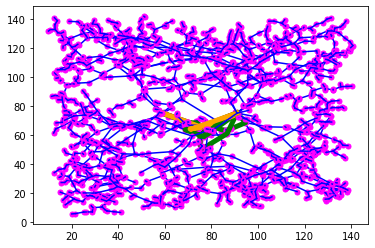

In [21]:
import socket  
import numpy as np
import math
from numpy.linalg import norm
from math import *
from matplotlib import pyplot as plt
from matplotlib.patches import Polygon
from random import random
from scipy.spatial import ConvexHull
from matplotlib import path
import time
from random import random
import keyboard ### NOTE: Run first: !pip install keyboard    in the terminal to install keyboard module
from IPython.display import clear_output

start = False
n = 0 # To show the first READY! message
index = 0 # To select the coordinates from the array

########################################################### SECTION FUNCTIONS
################################################################################################# STARTS COORD VISION TO NORM
def coordinatesfromvisiontonormal (XR1OPP,YR1OPP,XR2OPP,YR2OPP,XR3OPP,YR3OPP,XR1,YR1,XR2,YR2,XR3,YR3,Xball,Yball):
    XR1OPP = ((XR1OPP*10)/75)-25
    YR1OPP = abs((((YR1OPP*10)/75)-(5/3))-130)
    XR2OPP = ((XR2OPP*10)/75)-25
    YR2OPP = abs((((YR2OPP*10)/75)-(5/3))-130)
    XR3OPP = ((XR3OPP*10)/75)-25
    YR3OPP = abs((((YR3OPP*10)/75)-(5/3))-130)
    XR1 = ((XR1*10)/75)-25 #SET AS S
    YR1 = abs((((YR1*10)/75)-(5/3))-130)
    XR2 = ((XR2*10)/75)-25 #SET AS D
    YR2 = abs((((YR2*10)/75)-(5/3))-130)
    XR3 = ((XR3*10)/75)-25 #SET AS G
    YR3 = abs((((YR3*10)/75)-(5/3))-130)
    Xball = ((Xball*10)/75)-25
    Yball = abs((((Yball*10)/75)-(5/3))-130)
    return XR1OPP,YR1OPP,XR2OPP,YR2OPP,XR3OPP,YR3OPP,XR1,YR1,XR2,YR2,XR3,YR3,Xball,Yball
################################################################################################# ENDS COORD VISION TO NORM
################################################################################################# STARTS DISTANCES
def distances (XR1OPP,YR1OPP,XR2OPP,YR2OPP,XR3OPP,YR3OPP,XR1,YR1,XR2,YR2,XR3,YR3,Xball,Yball,side):

# DISTANCES RELEVANT TO S
    DS_GOP = 0 #DISTANCE FROM S TO THE OPPOSITE G
    DS_OP1 = 0 #DISTANCE FROM S TO THE OPPOSITE OP1
    DS_OP2 = 0 #DISTANCE FROM S TO THE OPPOSITE OP2

    DSB = 0 #DISTANCE FROM S TO THE BALL
    DC = 0 #DISTANCE FROM S TO THE GOAL LINE

    DSD = 0 #DISTANCES FROM S TO D = D TO S
    DSG = 0 #DISTANCES FROM S TO G = G TO S

# DISTANCES RELEVANT TO D
    DD_GOP = 0 #DISTANCE FROM D TO THE OPPOSITE G
    DD_OP1 = 0 #DISTANCE FROM D TO THE OPPOSITE OP1
    DD_OP2 = 0 #DISTANCE FROM D TO THE OPPOSITE OP2

    DDB = 0 #DISTANCE FROM D TO THE BALL
    DC2 = 0 #DISTANCE FROM D TO THE GOAL LINE

    DDS = 0 #DISTANCES FROM D TO S = S TO D
    DDG = 0 #DISTANCES FROM D TO G = G TO D

# DISTANCES RELEVANT TO G
    DG_GOP = 0 #DISTANCE FROM G TO THE OPPOSITE G
    DG_OP1 = 0 #DISTANCE FROM G TO THE OPPOSITE OP1
    DG_OP2 = 0 #DISTANCE FROM G TO THE OPPOSITE OP2

    DGB = 0 #DISTANCE FROM G TO THE BALL
    DC3 = 0 #DISTANCE FROM G TO THE GOAL LINE

    DGS = 0 #DISTANCES FROM G TO S = S TO G
    DGD = 0 #DISTANCES FROM G TO D = D TO G

# RELEVANT TO DETERMINE THE GOALIE 
    DGLR1OPP = 0  
    DGLR2OPP = 0
    DGLR3OPP = 0 
    OPGX = 0 
    OPGY = 0
# FOR COORDINATES OF THE OPP GOAL-LINE
    COPGX = 0
    COPGY = 0
# FOR COORDINATES OUR GOAL-LINE
    GLX = 0 
    GLY = 0


    if (side == 0): # LEFT
        COPGX = 150;
        COPGY = 65;
        GLX = 0;
        GLY = 65;
    
    if (side == 1): # RIGHT
        COPGX = 0;
        COPGY = 65
        GLX = 150;
        GLY = 65;

    DGLR1OPP = np.sqrt(pow((COPGX - XR1OPP),2) + pow((COPGY - YR1OPP),2))
    DGLR2OPP = np.sqrt(pow((COPGX - XR2OPP),2) + pow((COPGY - YR2OPP),2))
    DGLR3OPP = np.sqrt(pow((COPGX - XR3OPP),2) + pow((COPGY - YR3OPP),2))

# DETERMINE THE GOALIE
    if (DGLR1OPP < DGLR2OPP and DGLR1OPP < DGLR3OPP):
        OPGX = XR1OPP # SET R1 AS THE GOALIE
        OPGY = YR1OPP # SET R1 AS THE GOALIE
    if (DGLR2OPP < DGLR1OPP and DGLR2OPP < DGLR3OPP):
        OPGX = XR2OPP # SET R2 AS THE GOALIE
        OPGY = YR2OPP # SET R2 AS THE GOALIE
    if (DGLR3OPP < DGLR1OPP and DGLR3OPP < DGLR2OPP):
        OPGX = XR3OPP # SET R2 AS THE GOALIE
        OPGY = YR3OPP # SET R2 AS THE GOALIE
# GOALIE HAS BEEN DETERMINED 
  
# COMPUTE ALL THE EUCLIDEAN DISTANCES RELEVANT TO S
    DS_GOP = np.sqrt(pow((OPGX - XR1),2) + pow((OPGY - YR1),2))
    DS_OP1 = np.sqrt(pow((XR2OPP - XR1),2) + pow((YR2OPP - YR1),2))
    DS_OP2 = np.sqrt(pow((XR3OPP - XR1),2) + pow((YR3OPP - YR1),2))
  
    DSB = np.sqrt(pow((Xball - XR1),2) + pow((Yball - YR1),2))
    DC = np.sqrt(pow((GLX - XR1),2) + pow((GLY - YR1),2))
  
    DSD = np.sqrt(pow((XR2 - XR1),2) + pow((YR2 - YR1),2))
    DSG = np.sqrt(pow((XR3 - XR1),2) + pow((YR3 - YR1),2))

#COMPUTE ALL THE EUCLIDEAN DISTANCES RELEVANT TO D
    DD_GOP = np.sqrt(pow((OPGX - XR2),2) + pow((OPGY - YR2),2))
    DD_OP1 = np.sqrt(pow((XR2OPP - XR2),2) + pow((YR2OPP - YR2),2))
    DD_OP2 = np.sqrt(pow((XR3OPP - XR2),2) + pow((YR3OPP - YR2),2))
  
    DDB = np.sqrt(pow((Xball - XR2),2) + pow((Yball - YR2),2))
    DC2 = np.sqrt(pow((GLX - XR2),2) + pow((GLY - YR2),2))
  
    DDS = DSD
    DDG = np.sqrt(pow((XR3 - XR1),2) + pow((YR3 - YR1),2))

#COMPUTE ALL THE EUCLIDEAN DISTANCES RELEVANT TO G
    DG_GOP = np.sqrt(pow((OPGX - XR3),2) + pow((OPGY - YR3),2))
    DG_OP1 = np.sqrt(pow((XR2OPP - XR3),2) + pow((YR2OPP - YR3),2))
    DG_OP2 = np.sqrt(pow((XR3OPP - XR3),2) + pow((YR3OPP - YR3),2))
  
    DGB = np.sqrt(pow((Xball - XR3),2) + pow((Yball - YR3),2))
    DC3 = np.sqrt(pow((GLX - XR3),2) + pow((GLY - YR3),2))

    DGS = DSG
    DGD = DDG

    return DS_GOP, DS_OP1, DS_OP2, DSB, DC, DSD, DSG, DD_GOP, DD_OP1, DD_OP2, DDB, DC2, DDS, DDG, DG_GOP, DG_OP1,DG_OP2, DGB, DC3
################################################################################################# ENDS DISTANCES
################################################################################################# STARTS KICKOFF
def kickoff (KICKOFF,BALLPOSSE,SIDE):
    
####################### Positions of our robots (only for internal use)
    # GOALIE R3 - DEF R2 - STR R1
    Xpr1 = 0
    Xpr2 = 0
    Xpr3 = 0
    Ypr1 = 0
    Ypr2 = 0
    Ypr3 = 0
    Ar1 = 0
    Ar2 = 0
    Ar3 = 0
######################

###################################################################################################### KICKOFF POS
    if (KICKOFF == 1):
############################################################ ATTACKING POSITIONING FOR KICKOFF
        if (BALLPOSSE == 1):
            if (SIDE == 0):
                ####### SETS THE ROBOT (THE GOALIE) INSIDE THE GOAL ZONE (CENTER)
                Xpr3 = 300 #X value center of the goal zone left side
                Ypr3 = 500 #Y value center of the goal zone left side
                Ar3 = 0 # ANGLE
                ####### PICK A RANDOM POSITION BETWEEN DOT 1 AND DOT 2
                rnd = random.random()
                if (rnd < 0.5):
                    Xpr2 = 468.75 #Xvalue DOT 1 (UP)
                    Ypr2 = 200 #Yvalue DOT 1 (UP)
                    Ar2 = -45 #ANGLE
                if (rnd > 0.5):
                    Xpr2 = 468.75 #Xvalue DOT 2 (DOWN)
                    Ypr2 = 800 #Yvalue DOT 2 (DOWN)
                    Ar2 = 45 #ANGLE
                ####### FOR R3 SET IT IN THE CENTER OVER THE LINE OF THE MIDDLE CIRCLE RIGHT IN FRONT OF THE BALL
                Xpr1 = 550 #Xcenl
                Ypr1 = 500 #Ycenl
                Ar1 = 0 #ANGLE
###############################################################################################################FIRST IF BREAKS
            if (SIDE == 1):
                ####### SETS THE ROBOT (THE GOALIE) INSIDE THE GOAL ZONE (CENTER)
                Xpr3 = 1256.25 #X value center of the goal zone R side
                Ypr3 = 500 #Y value center of the goal zone R side
                Ar3 = 180 #ANGLE
                ####### PICK A RANDOM POSITION BETWEEN DOT 3 AND DOT 4
                rnd = random.random()
                if (rnd < 0.5):
                    Xpr2 = 843.75 #Xvalue DOT 3 (UP)
                    Ypr2 = 200 #Yvalue DOT 3 (UP)
                    Ar2 = 225 #ANGLE
                if (rnd > 0.5):
                    Xpr2 = 843.75 #Xvalue DOT 4 (DOWN)
                    Ypr2 = 800 #Yvalue DOT 2 (DOWN)
                    Ar2 =135 #ANGLE
            ####### FOR R3 SET IT IN THE CENTER OVER THE LINE OF THE MIDDLE CIRCLE RIGHT IN FRONT OF THE BALL
                Xpr1 = 812.5 #XcenR
                Ypr1 = 500 #YcenR
                Ar1 = 180 #ANGLE
##############################################################################################################SECOND IF BREAKS
############################################################ ENDS ATTACKING POSITIONING FOR KICKOFF
############################################################ DEFENDING POSITIONING FOR KICKOFF       
        if (BALLPOSSE == 0): 
            if (SIDE == 0):
                Xpr3 = 187.5 #XGZL
                Ypr3 = 500 #YGZL
                Ar3 = 0
                Xpr2 = 468.75 #XFBLUP 
                Ypr2 = 200 #YFBLUP
                Ar2 = 0
                Xpr1 = 618.75 #XFBLDOWN
                Ypr1 = 800 #YFBLDOWN
                Ar1 = 45
            if (SIDE == 1):
                Xpr3 = 1256.25 #XGZR
                Ypr3 = 500 #YGZR
                Ar3 = 180
                Xpr2 = 693.75 #XFBRUP 
                Ypr2 = 200 #YFBRUP
                Ar2 = 225
                Xpr1 = 843.75 #XFBRDOWN
                Ypr1 = 800 #YFBRDOWN
                Ar1 = 180
############################################################ DEFENDING POSITIONING FOR KICKOFF  
    return Xpr1, Xpr2, Xpr3, Ypr1, Ypr2, Ypr3, Ar1, Ar2, Ar3
###################################################################################################### ENDS KICKOFF POS
###################################################################################################### STARTS GOES FOR THE BALL
def GOESFORTHEBALL(Xball,Yball,XR3,YR3,XR2,YR2,XR1,YR1):
    R3_2ball = math.sqrt((Xball-XR3)**2 + (Yball-YR3)**2)
    R2_2ball = math.sqrt((Xball-XR2)**2 + (Yball-YR2)**2)
    R1_2ball = math.sqrt((Xball-XR1)**2 + (Yball-YR1)**2)
    if R3_2ball <= R2_2ball:
        if R3_2ball <= R1_2ball:
            return 3
        else:
            return 1
    else:
        if R2_2ball <= R1_2ball:
            return 2
        else:
            return 1
            
# BALL REAL TIME
#         Xball = float (arr[0])
#         Yball = float (arr[1])
#         # GOALIE (OURS) REAL TIME
#         XR3 = float(arr[2])
#         YR3 = float(arr[3])
#         Ar3 = float(arr[4])
#         # MID - DEF (OURS) REAL TIME
#         XR2 = float(arr[5])
#         YR2 = float(arr[6])
#         Ar2 = float(arr[7])
#         # STRIKER (OURS) REAL TIME
#         XR1 = float(arr[8])
#         YR1 = float(arr[9])
#         Ar1 = float(arr[10])
#         # GOALIE (OPP) REAL TIME
#         XR1OPP = float(arr[11])
#         YR1OPP = float(arr[12])
#         # MID - DEF (OPP) REAL TIME
#         XR2OPP = float(arr[14])
#         YR2OPP = float(arr[15])
#         # STRIKER (OPP) REAL TIME
#         XR3OPP = float(arr[17])
#         YR3OPP = float(arr[18])
# def GOESFORTHEBALL (DS_GOP, DS_OP1, DS_OP2, DSB, DC, DSD, DSG, DD_GOP, DD_OP1, DD_OP2, DDB, DC2, DDS, DDG, DG_GOP, DG_OP1,DG_OP2, DGB, DC3):
# #### TO RECOVER THE BALL
#     if DGB >= DSB and DDB >= DSB and DC > 20:
#         if DS_OP1 >= DSB and DS_GOP >= DSB and DS_OP2 >= DSB:
#             #print ("S GOES FOR THE BALL") #Here Path Planning Should be Called
#             return 1
#     if DGB < 20:
#         if DG_OP1 >= 20 and DG_GOP >= 20 and DG_OP2 >= 20:
#             #print ("G GOES FOR THE BALL") #Here Path Planning Should be Called
#             return 2

#     if DGB >= DDB and DSB > DDB and DC2 > 20:
#         if DS_OP1 >= DSB and DS_GOP >= DSB and DS_OP2 >= DSB:
#             #print ("D GOES FOR THE BALL") #Here Path Planning SHould be called
#             return 3
###################################################################################################### ENDS GOES FOR THE BALL
###################################################################################################### STARTS PATH PLANNING
def pathplanningRRT (Xobs1, Yobs1, Xobs2, Yobs2, Xobs3, Yobs3, Xobs4, Yobs4, Xobs5, Yobs5, Xstart, Ystart, Xgoal, Ygoal):
    
    def isCollisionFreeVertex(obstacles, xy):
        collFree = True

        for obstacle in obstacles:
            hull = path.Path(obstacle)
            collFree = not hull.contains_points([xy])
            if hull.contains_points([xy]):
                return False
        return collFree

    def isCollisionFreeEdge(obstacles, closest_vert, xy):
        closest_vert = np.array(closest_vert); xy = np.array(xy)
        collFree = True
        l = norm(closest_vert - xy)
        map_resolution = 0.01; M = int(l / map_resolution)
        if M <= 2: M = 20
        t = np.linspace(0,1,M)
        for i in range(1,M-1):
            p = (1-t[i])*closest_vert + t[i]*xy # COMPUTES CONFIGURATION
            collFree = isCollisionFreeVertex(obstacles, p) 
            if collFree == False: return False
        return collFree

    def draw_map(obstacles):

        # Bounds on world
        world_bounds_x = [-0, 150]
        world_bounds_y = [-0, 130]

        # Draw obstacles
        #fig = plt.figure(figsize=(10, 10))
        #plt.grid()
        #ax = plt.gca()
        #ax.set_xlim(world_bounds_x)
        #ax.set_ylim(world_bounds_y)
        for k in range(len(obstacles)):
            ax.add_patch( Polygon(obstacles[k]) )
        
    obstacles = [
                 np.array([[Xobs1-5, Yobs1-5], [Xobs1-5, Yobs1+5], [Xobs1+5, Yobs1+5], [Xobs1+5, Yobs1-5]]),
                 np.array([[Xobs2-5, Yobs2-5], [Xobs2-5, Yobs2+5], [Xobs2+5, Yobs2+5], [Xobs2+5, Yobs2-5]]),
                 np.array([[Xobs3-5, Yobs3-5], [Xobs3-5, Yobs3+5], [Xobs3+5, Yobs3+5], [Xobs3+5, Yobs3-5]]), 
                 np.array([[Xobs4-5, Yobs4-5], [Xobs4-5, Yobs4+5], [Xobs4+5, Yobs4+5], [Xobs4+5, Yobs4-5]]),
                 np.array([[Xobs5-5, Yobs5-5], [Xobs5-5, Yobs5+5], [Xobs5+5, Yobs5+5], [Xobs5+5, Yobs5-5]]),
                ]
    #draw_map(obstacles)

    class Node:
        def __init__(self):
            self.p     = [0, 0]
            self.i     = 0
            self.iPrev = 0
            
    def closestNode(rrt, p):
        distance = []
        for node in rrt:
            distance.append( sqrt((p[0] - node.p[0])**2 + (p[1] - node.p[1])**2) )
        distance = np.array(distance)
    
        dmin = min(distance)
        ind_min = distance.tolist().index(dmin)
        closest_node = rrt[ind_min]

        return closest_node

    def SmoothPath(P, obstacles, smoothiters):
    # INPUTS
    #   P - path to get smoothed (after RRT algorithm)
    #   obstacles - TELLS WHERE THE OBSTACLES ARE
    #   smoothiters - MAXIMUM NUMBER OF ITERATIONS
    # OUTPUTS
    #    P_smoothed   
    #    P_smoothed = [q1 q2 q3 ... qM]
    
        m = P.shape[0]
        l = np.zeros(m)
        for k in range(1, m):
            l[k] = norm(P[k,:]-P[k-1,:]) + l[k-1] # FINDS ALL THE STRAIGTH-LINE DISTANCES
        iters = 0
        while iters < smoothiters:
            s1 = random()*l[m-1] 
            s2 = random()*l[m-1]
            if s2 < s1:
                temps = s1
                s1 = s2
                s2 = temps
            for k in range(1, m):
                if s1 < l[k]:
                    i = k - 1
                    break
            for k in range(i, m):
                if s2 < l[k]:
                    j = k - 1
                    break
            if (j <= i):
                iters = iters + 1
                continue
            t1 = (s1 - l[i]) / (l[i+1]-l[i])
            gamma1 = (1 - t1)*P[i,:] + t1*P[i+1,:]
            t2 = (s2 - l[j]) / (l[j+1]-l[j])
            gamma2 = (1 - t2)*P[j,:] + t2*P[j+1,:]
        
            collisionFree = isCollisionFreeEdge(obstacles, gamma1, gamma2)
            if collisionFree == 0:
                iters = iters + 1
                continue

            P = np.vstack([P[:(i+1),:], gamma1, gamma2, P[(j+1):m,:]])
            m = P.shape[0]
            l = np.zeros(m)
            for k in range(1, m):
                l[k] = norm( P[k,:] - P[k-1,:] ) + l[k-1]
            iters = iters + 1

        P_smooth = P
    
        return P_smooth

# Initialization
    visualize = 1
    maxiters  = 5000
    nearGoal = False # This will be set to true if goal has been reached
    minDistGoal = 0.25 # Convergence criterion: success when the tree reaches within 0.25 in distance from the goal.
    d = 0.20 # Extension parameter: this controls how far the RRT extends in each step.

    #draw_map(obstacles)

# Start and goal positions
    xy_start = np.array([Xstart, Ystart]);# plt.plot(xy_start[0],xy_start[1],'bo',color='red', markersize=20)
    xy_goal =  np.array([Xgoal, Ygoal]); # plt.plot(xy_goal[0], xy_goal[1], 'bo',color='green',markersize=20)
    print("hi2")
# The RRT is a 2 x N list of points.
# Each column represents a vertex of the tree.
    rrt = []
    start_node = Node()
    start_node.p = xy_start
    start_node.i = 0
    start_node.iPrev = 0
    rrt.append(start_node)


# RRT algorithm
    start_time = time.time()
    iters = 0
    while not nearGoal and iters < maxiters:
        # Sample point
        rnd = random()
        # With probability 0.05, sample the goal. This promotes movement to the goal.
        if rnd < 0.05:
            xy = xy_goal
        else:
            # Sample (uniformly) from space (with probability 0.95). The space is defined
            # with the bounds world_bounds_x and world_bounds_y defined above.
            xy = np.array([random()*150, random()*150]) 
        # Check if sample is collision free
        collFree = isCollisionFreeVertex(obstacles, xy)
        # If it's not collision free, continue with loop
        if not collFree:
            iters += 1
            continue

        # If it is collision free, find closest point in existing tree. 
        closest_node = closestNode(rrt, xy)
    
        # Extend tree towards xy from closest_vert. Parameter d is step size. Thus, the Euclidean
        # distance between new_vert and closest_vert should be d.
        new_node = Node()
        new_node.p = closest_node.p + d * (xy - closest_node.p)
        new_node.i = len(rrt)
        new_node.iPrev = closest_node.i

        # Check if new vertice is in collision
        collFree = isCollisionFreeEdge(obstacles, closest_node.p, new_node.p)
        # If it's not collision free, continue with loop
        if not collFree:
            iters += 1
            continue
    
        # If it is collision free, add it to tree    
        rrt.append(new_node)

        if visualize:
            # plt.plot(xy[0], xy[1], 'ro', color='k')
            plt.plot(new_node.p[0], new_node.p[1], 'bo',color = 'magenta', markersize=5) # VERTICES
            plt.plot([closest_node.p[0], new_node.p[0]], [closest_node.p[1], new_node.p[1]], color='blue') # EDGES
    
        # Check if we have reached the goal
        if norm(np.array(xy_goal) - np.array(new_node.p)) < minDistGoal:
            # Add last, goal node
            goal_node = Node()
            goal_node.p = xy_goal
            goal_node.i = len(rrt)
            goal_node.iPrev = new_node.i
            if isCollisionFreeEdge(obstacles, new_node.p, goal_node.p):
                rrt.append(goal_node)
                P = [goal_node.p]
            else: P = []
            end_time = time.time()
            nearGoal = True
            print ("Reached the goal after %.2f seconds:" % (end_time - start_time))

        iters += 1

    print ('Number of iterations passed: %d / %d' %(iters, maxiters))
    print ('RRT length: ', len(rrt))

# Path construction from RRT:
    print ('Constructing the path...')
    i = len(rrt) - 1
    while True:
        i = rrt[i].iPrev
        P.append(rrt[i].p)
        if i == 0:
            print ('Reached RRT start node')
            break
    P = np.array(P)
    plt.plot( P[:,0], P[:,1], color='green', linewidth=5, label='RRT path' )

# Path smoothing:
    print ('Path smoothing...')
    P_smooth = SmoothPath(P, obstacles, smoothiters = 10)
    plt.plot(P_smooth[:,0], P_smooth[:,1], linewidth=5, color='orange', label='smoothed path')

### reversed points for pic
    A = np.abs(P_smooth+[0,-130])
    #print ("Normal Coordinates")
    #print (P)
    #print ("Mirror Y Coordinates")
    #print (A)
    #print ("Converted Coordinates")
    WCONV = ((A*75)/10)+[187.5,12.5]
    #print (WCONV)
    
    return WCONV
###################################################################################################### STARTS PATH PLANNING
########################################################### ENDS SECTION FUNCTIONS


#################################################### Needed
side = 0 # 0 = LEFT / 1 = RIGHT

## THESE COME FROM THE REFEREE
SIDE = 0  # 0 = LEFT / 1 = RIGHT
BALLPOSSE = 0 # DECIDED BY TOSSING A COIN
KICKOFF = 0 # IF KICKOFF = 1 THERE IS A KICKOFF

####################################################


#### STARTS "MAIN"

HOST = 'localhost'
PORT = 12345
s = socket.socket()
s.connect((HOST, PORT))
print("Data from Python:")
change = 1
#################### START DATA RECEIVE ###############################3"
########################################################################################################## STARTS REC DATA 
while True: 
    if change == 1:
        index = 0 # To select the coordinates from the array
        change = 0
    data = s.recv(1000)
    data2 = data.decode()
    arr = data2.split()
    if len(arr)>20:
        arr = arr[arr.index('s')+1:]
        arr = arr[:arr.index('\x00')]
        data = ""
        # BALL REAL TIME
        Xball = float (arr[0])
        Yball = float (arr[1])
        
        ################ PLAYERS FROM OWN TEAM #####################################################################################################################################
        # GOALIE (OURS) REAL TIME
        XR3 = float(arr[2])
        YR3 = float(arr[3])
        Ar3 = float(arr[4])
        # MID - DEF (OURS) REAL TIME
        XR2 = float(arr[5])
        YR2 = float(arr[6])
        Ar2 = float(arr[7])
        # STRIKER (OURS) REAL TIME
        XR1 = float(arr[8])
        YR1 = float(arr[9])
        Ar1 = float(arr[10])
        ################ PLAYERS FROM OWN TEAM #####################################################################################################################################
        # GOALIE (OPP) REAL TIME
        XR1OPP = float(arr[11])
        YR1OPP = float(arr[12])
        # MID - DEF (OPP) REAL TIME
        XR2OPP = float(arr[14])
        YR2OPP = float(arr[15])
        # STRIKER (OPP) REAL TIME
        XR3OPP = float(arr[17])
        YR3OPP = float(arr[18])
        
        if n == 0:
            print("READY!")
        n = n+1
        
        ############################# SEND DATA TO PROCESSING SERVER ##################################################
        if keyboard.is_pressed('ENTER'):
            start = True
            print("Key pressed")

####################################################################################################################################################################           

        if start == True:
            case = GOESFORTHEBALL(Xball,Yball,XR3,YR3,XR2,YR2,XR1,YR1)
            XR1OPP,YR1OPP,XR2OPP,YR2OPP,XR3OPP,YR3OPP,XR1,YR1,XR2,YR2,XR3,YR3,Xball,Yball = coordinatesfromvisiontonormal (XR1OPP,YR1OPP,XR2OPP,YR2OPP,XR3OPP,YR3OPP,XR1,YR1,XR2,YR2,XR3,YR3,Xball,Yball)
            print(case)
            #coordinates = pathplanningRRT (Xobs1, Yobs1, Xobs2, Yobs2, Xobs3, Yobs3, Xobs4, Yobs4, Xobs5, Yobs5, Xstart, Ystart, Xgoal, Ygoal)
            
            if case == 3: # S GOES FOR THE BALL

                ############################### S GOES FOR THE BALL R3
                Xobs1 = XR1
                Yobs1 = YR1
                Xobs2 = XR2
                Yobs2 = YR2
                Xobs3 = XR1OPP
                Yobs3 = YR1OPP
                Xobs4 = XR2OPP
                Yobs4 = YR2OPP
                Xobs5 = XR3OPP
                Yobs5 = YR3OPP
                Xgoal = Xball
                Ygoal = Yball
                Xstart = XR3
                Ystart = YR3
                print("hi")
                WCONV =  pathplanningRRT (Xobs1, Yobs1, Xobs2, Yobs2, Xobs3, Yobs3, Xobs4, Yobs4, Xobs5, Yobs5, Xstart, Ystart, Xgoal, Ygoal)

#                 ################################ D MOVES R2
#                 Xobs1 = XR1
#                 Yobs1 = YR1
#                 Xobs2 = XR3
#                 Yobs2 = YR3
#                 Xobs3 = XR1OPP
#                 Yobs3 = YR1OPP
#                 Xobs4 = XR2OPP
#                 Yobs4 = YR2OPP
#                 Xobs5 = XR3OPP
#                 Yobs5 = YR3OPP
#                 if Xball < 45:
#                     Xball = Xball + 40 
#                 if Xball > 85:
#                     Xball = Xball - 40
#                 if Yball < 45:
#                     Yball = Yball +40 
#                 if Yball > 105:
#                     Yball = Yball - 40
#                 Xgoal = Xball
#                 Ygoal = Yball
#                 Xstart = XR2
#                 Ystart = YR2
#                 WCONV2 = pathplanningRRT (Xobs1, Yobs1, Xobs2, Yobs2, Xobs3, Yobs3, Xobs4, Yobs4, Xobs5, Yobs5, Xstart, Ystart, Xgoal, Ygoal)

#                 ################################# G ANGLE
#                 if (side == 0): # LEFT
#                     GLXours = 0;
#                     GLYours = 65;

#                 if (side == 1): # RIGHT
#                     GLXours = 150;
#                     GLYours = 65;

#                 Ar1desired = np.rad2deg(np.arctan((Yball - GLYours)/(Xball-GLXours)))

            if case == 1: # G GOES FOR THE BALL
                Xobs1 = XR3
                Yobs1 = YR3
                Xobs2 = XR2
                Yobs2 = YR2
                Xobs3 = XR1OPP
                Yobs3 = YR1OPP
                Xobs4 = XR2OPP
                Yobs4 = YR2OPP
                Xobs5 = XR3OPP
                Yobs5 = YR3OPP
                Xgoal = Xball
                Ygoal = Yball
                Xstart = XR1
                Ystart = YR1
                WCONV = pathplanningRRT (Xobs1, Yobs1, Xobs2, Yobs2, Xobs3, Yobs3, Xobs4, Yobs4, Xobs5, Yobs5, Xstart, Ystart, Xgoal, Ygoal)

            if case == 2: # D GOES FOR THE BALL

                ############################### S GOES FOR THE BALL R3
                Xobs1 = XR1
                Yobs1 = YR1
                Xobs2 = XR3
                Yobs2 = YR3
                Xobs3 = XR1OPP
                Yobs3 = YR1OPP
                Xobs4 = XR2OPP
                Yobs4 = YR2OPP
                Xobs5 = XR3OPP
                Yobs5 = YR3OPP
                Xgoal = Xball
                Ygoal = Yball
                Xstart = XR2
                Ystart = YR2
                WCONV =  pathplanningRRT (Xobs1, Yobs1, Xobs2, Yobs2, Xobs3, Yobs3, Xobs4, Yobs4, Xobs5, Yobs5, Xstart, Ystart, Xgoal, Ygoal)

                ################################ D MOVES R2
#                 Xobs1 = XR1
#                 Yobs1 = YR1
#                 Xobs2 = XR2
#                 Yobs2 = YR2
#                 Xobs3 = XR1OPP
#                 Yobs3 = YR1OPP
#                 Xobs4 = XR2OPP
#                 Yobs4 = YR2OPP
#                 Xobs5 = XR3OPP
#                 Yobs5 = YR3OPP
#                 if Xball < 45:
#                     Xball = Xball + 40 
#                 if Xball > 85:
#                     Xball = Xball - 40
#                 if Yball < 45:
#                     Yball = Yball +40 
#                 if Yball > 105:
#                     Yball = Yball - 40
#                 Xgoal = Xball
#                 Ygoal = Yball
#                 Xstart = XR3
#                 Ystart = YR3
#                 WCONV2 = pathplanningRRT (Xobs1, Yobs1, Xobs2, Yobs2, Xobs3, Yobs3, Xobs4, Yobs4, Xobs5, Yobs5, Xstart, Ystart, Xgoal, Ygoal)

                ################################# G ANGLE
#                 if (side == 0): # LEFT
#                     GLXours = 0;
#                     GLYours = 65;

#                 if (side == 1): # RIGHT
#                     GLXours = 150;
#                     GLYours = 65;

#                 Ar1desired = np.rad2deg(np.arctan((Yball - GLYours)/(Xball-GLXours)))
            
            # Case 1, 2 o 3
            #XR1OPP,YR1OPP,XR2OPP,YR2OPP,XR3OPP,YR3OPP,XR1,YR1,XR2,YR2,XR3,YR3,Xball,Yball = coordinatesfromvisiontonormal (XR1OPP,YR1OPP,XR2OPP,YR2OPP,XR3OPP,YR3OPP,XR1,YR1,XR2,YR2,XR3,YR3,Xball,Yball)
#             DS_GOP, DS_OP1, DS_OP2, DSB, DC, DSD, DSG, DD_GOP, DD_OP1, DD_OP2, DDB, DC2, DDS, DDG, DG_GOP, DG_OP1,DG_OP2, DGB, DC3 = distances (XR1OPP,YR1OPP,XR2OPP,YR2OPP,XR3OPP,YR3OPP,XR1,YR1,XR2,YR2,XR3,YR3,Xball,Yball,0)
#             case = GOESFORTHEBALL (DS_GOP, DS_OP1, DS_OP2, DSB, DC, DSD, DSG, DD_GOP, DD_OP1, DD_OP2, DDB, DC2, DDS, DDG, DG_GOP, DG_OP1,DG_OP2, DGB, DC3)
            # print(case)
            #coordinates = [[640,400],[680,390],[690,360],[700,340],[720,300],[740,300],[760,300],[780,300],[800,300],[850,300]]
            #coordinates = [[640,450],[680,460],[690,490],[700,510],[720,550],[740,550],[760,550],[780,550],[800,550],[850,550]]
            #coordinates = np.floor(WCONV)
            coordinates = [[749.,499.], [750.,497.], [750.,496.], [751.,494.], [751.,491.], [753.,487.], [761.,480.], [805.,450.], [853.,419.]]
            print(coordinates)
            #coordinates = [[630,450],[620,460],[610,490],[600,510],[580,550],[560,550],[540,550],[520,550],[500,550],[450,550]]
            #coordinates = [[629, 424], [638,425], [741, 490], [752, 497], [753, 498], [752, 498],[751,498],[751,498],[751,498],[749,499]]
            ############################# TARGET ANGLE #######################
            ####### NOTA! Para cada punto de la trayectoria del path planning, x1 y y1 son las posiciones actuales del robot, 
            # es decir: XR3 y YR3 para el primer robot. Mientras que x2 y y2 son las siguientes coordenadas a seguir de la trayectoria
            # Mientras el robot avanza por la trayectoria que le digamos, x1 y y1 se actualizan a lo que envíe el sistema de visión y
            # x2 y y2 se actualizan al siguiente punto de la trayectoria
            
            # x1 and y1 are the robot points
#             x1 = XR3
#             y1 = YR3
            if case == 1:
                x1 = XR1
                y1 = YR1
                Robot_angle = Ar1
            if case == 2:
                x1 = XR2
                y1 = YR2
                Robot_angle = Ar2
            if case == 3:
                x1 = XR3
                y1 = YR3
                Robot_angle = Ar3
            
            # x2 and y2 are the goal points  ###### HERE THE TARGET COORDINATES ARE MANUALLY SET #########
            x2 = coordinates[index][0]
            y2 = coordinates[index][1]
            if index < (len(coordinates)-1):
                index = index+1
            else:
                change = 1
            
            if x2 != x1:
                slope = (y1-y2)/(x2-x1)
                theta = math.degrees(math.atan(slope))
                if theta>0:
                    if (x2-x1)<0:
                        theta = theta + 180.0
                elif theta<0:
                    if (x2-x1)<0:
                        theta = 180.0 + theta
                    else:
                        theta = 360.0 + theta
                else:
                    if (x2-x1)<0:
                        theta = 180.0
            else:
                if y1 > y2:
                    theta = 90.0
                else:
                    theta = 270.0

            if Robot_angle<180:
                limit = Robot_angle + 180
                if theta > limit:
                    angle_error = -(360-(theta-Robot_angle))
                else:
                    angle_error = (theta-Robot_angle)
            elif (Robot_angle)>180:
                limit = Robot_angle - 180
                if theta < limit:
                    angle_error = 360+(theta-Robot_angle)
                else:
                    angle_error = (theta-Robot_angle)
            else:
                angle_error = (theta-Robot_angle)

            ka = 0.05  # Gain for the angular velocity controller (Adjust if the robot spins too fast or too slow)
            angle = ka * angle_error
            kv = 0.005 # Gain for the linear velocity controller (Adjust if the robot goes too fast or too slow)
            LV = kv*math.sqrt((x2-x1)**2 + (y2-y1)**2)
            if (math.sqrt((x2-x1)**2 + (y2-y1)**2))<10: # This is to avoid that the robot spins when it achieves the goal point
                angle = 0.0
                LV = 0.0
            
            if case == 1:
                LV1 = LV
                AV1 = angle
                LV2 = 0.0
                AV2 = 0.0
                LV3 = 0.0
                AV3 = 0.0
            if case == 2:
                LV1 = 0.0
                AV1 = 0.0
                LV2 = LV
                AV2 = angle
                LV3 = 0.0
                AV3 = 0.0
            if case == 3:
                LV1 = 0.0
                AV1 = 0.0
                LV2 = 0.0
                AV2 = 0.0
                LV3 = LV
                AV3 = angle
            
            if change == 1:
                LV1 = 0.0 
                AV1 = 0.0
                LV2 = 0.0
                AV2 = 0.0
                LV3 = 0.0
                AV3 = 0.0
#             LV1 = 0.0
#             angle = 0.0
#             clear_output()
            print(math.sqrt((x2-XR3)**2 + (y2-YR3)**2))
            print("Linear Velocity 1:", LV)
            print("Angular Velocity 1:", angle)
            print(arr[2],arr[3],arr[4])
            data = str(2)+ " " + str(LV1)+ " " + str(AV1) + "\n\0"
            data = str(data).encode()
            s.send(data)
            data = str(0)+ " " + str(LV3)+ " " + str(AV3) + "\n\0"
            data = str(data).encode()
            s.send(data)
            data = str(1)+ " " + str(LV2)+ " " + str(AV2) + "\n\0"
            data  = str(data).encode()
            s.send(data)
            print("FINISH")
    ########################################################################################################## ENDS REC DATA